In [1]:
#importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [169]:
train = pd.read_csv('train_LZdllcl.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [85]:
train.groupby('department').sum()

,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_joined,imp_sum,training_hours
department,,,,,,,,,,,,,,,,
1,209301691,94197.0,12441.0,10191.0,10027.0,7160,173572,17381.0,26400,2163,130,452795,512,147172,19674.0,605551
2,101257247,43051.0,6140.0,4391.0,4677.0,3307,81301,7900.0,12222,1052,70,152723,206,69079,9022.0,199370
3,96807617,38888.0,6398.0,3830.0,4391.0,2548,83145,7565.0,13743,808,45,120944,136,69402,8418.0,127445
4,39642336,16909.0,2451.0,1929.0,1923.0,1132,35152,2966.0,4779,347,25,62203,53,30373,3338.0,67830
5,443990620,184167.0,28976.0,18019.0,21248.0,13173,409364,39082.0,72809,4888,262,683452,1023,336555,44232.0,793792
6,282026620,109970.0,19421.0,10989.0,13331.0,9442,256254,22132.0,45191,2695,171,500534,688,211063,24998.0,661193
7,38203769,17308.0,2828.0,1941.0,1868.0,1401,32810,3250.0,4550,416,21,84512,69,28260,3687.0,118532
8,658546926,276603.0,40437.0,30526.0,31681.0,21512,587053,47642.0,99563,4464,361,846407,1213,487490,52467.0,1078951
9,278468259,119346.0,18770.0,11488.0,13244.0,9000,248882,20822.0,42220,2458,185,570531,768,206662,23465.0,719405


In [170]:
train.fillna(0.0,inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train['imp_sum'] = train['awards_won?'] + train['KPIs_met >80%'] +train.previous_year_rating
train.info()

In [218]:
from sklearn.utils import resample

df_minority_upsampled = resample(train, 
                                 replace=True,     
                                 n_samples=10000,    
                                 random_state=123) 
df_train = pd.concat([train, df_minority_upsampled])
df_train.is_promoted.value_counts()

0    59276
1     5532
Name: is_promoted, dtype: int64

In [7]:
def con_2_cat(df):
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()


In [8]:
def numericalize(df,col,name):
    if not pd.api.types.is_numeric_dtype(col):
        df[name] = pd.Categorical(col).codes + 1 


In [219]:
con_2_cat(train)
for label,content in train.items():
    numericalize(train,content,label)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int8   
 2   region                54808 non-null  int8   
 3   age                   54808 non-null  int64  
 4   previous_year_rating  54808 non-null  float64
 5   length_of_service     54808 non-null  int64  
 6   KPIs_met >80%         54808 non-null  int64  
 7   awards_won?           54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
 9   is_promoted           54808 non-null  int64  
 10  age_joined            54808 non-null  int64  
 11  avg_score             54808 non-null  float64
dtypes: float64(2), int64(8), int8(2)
memory usage: 4.3 MB


In [220]:
train['age_joined'] = train.age - train.length_of_service
#train['imp_sum'] = train['awards_won?'] + train['KPIs_met >80%'] +train.previous_year_rating
#train['training_hours'] = train.no_of_trainings * train.avg_training_score

In [194]:
#train.drop(['imp_sum','training_hours'],axis = 1,inplace = True)
train.drop(['education','no_of_trainings','gender'],axis = 1,inplace = True)

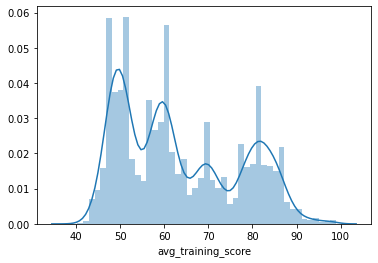

In [95]:
sns.distplot(train['avg_training_score'],hist = True)

<Figure size 1080x360 with 0 Axes>

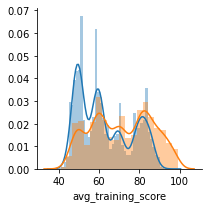

In [98]:
g = sns.FacetGrid(train, hue="is_promoted")
g = g.map(sns.distplot, "avg_training_score")

In [175]:
avg_score = train.groupby(['department','region'])['avg_training_score'].transform('mean')
avg_score = avg_score/avg_score.mean()

In [176]:
train['avg_score'] = avg_score

In [209]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler1 = MinMaxScaler()

In [211]:
df_sc2 = scaler1.fit_transform(train.drop('is_promoted',axis = 1))


In [221]:
df_sc = scaler.fit_transform(train.drop(['is_promoted'],axis = 1))
y = train.is_promoted

In [222]:
X_train, X_valid, y_train, y_valid = train_test_split(df_sc, y, test_size=0.33, random_state=42, stratify = y)

In [212]:
X_train, X_valid, y_train, y_valid = train_test_split(df_sc2, y, test_size=0.33, random_state=42, stratify = y)

In [12]:
def print_score(m):
    res = [f1_score(m.predict(X_train), y_train),
           f1_score(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [27]:
#dimensanility reduction was not helping in improving the f1_score
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=12)
for X_batch in np.array_split(df_sc, n_batches):
    inc_pca.partial_fit(X_batch)
X_train_reduced = inc_pca.transform(df_sc)

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(df_sc, y, test_size=0.33, random_state=42, stratify = y)

In [31]:
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000,max_depth=3, 
                                 min_samples_split=2, min_samples_leaf=1, 
                                 subsample=1,max_features='sqrt', random_state=42)
%time gbc.fit(X_train,y_train)
print_score(gbc)

Wall time: 15.8 s
[0.4616497829232995, 0.43529995042141795, 0.9392173415756652, 0.9370265936860729]


Accuracy of the GBM on test set: 0.927
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     16547
           1       0.87      0.17      0.28      1540

    accuracy                           0.93     18087
   macro avg       0.90      0.58      0.62     18087
weighted avg       0.92      0.93      0.90     18087



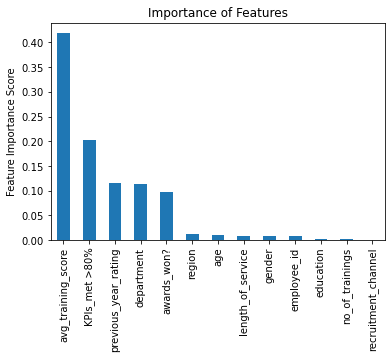

In [35]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(train.drop('is_promoted',axis =1).columns)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_valid, y_valid)))
pred=baseline.predict(X_valid)
print(classification_report(y_valid, pred))

In [137]:
from sklearn.metrics import make_scorer
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring=make_scorer(f1_score),n_jobs=-1,iid=False, cv=3)
%time tuning.fit(X_train,y_train)

Wall time: 16min 10s


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...ne,
              

In [138]:
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 1000}, 0.503496145709515)

In [1]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,n_estimators=1000, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42), 
            param_grid = p_test2, scoring=make_scorer(f1_score),n_jobs=-1,iid=False, cv=3)
%time tuning.fit(X_train,y_train)

NameError: name 'GridSearchCV' is not defined

In [140]:
tuning.best_params_, tuning.best_score_

({'max_depth': 3}, 0.4983459317730638)

Wall time: 3min 1s
[0.5872909698996656, 0.506258692628651, 0.9495928760110018, 0.9411179300049759]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16547
           1       0.88      0.35      0.51      1540

    accuracy                           0.94     18087
   macro avg       0.91      0.68      0.74     18087
weighted avg       0.94      0.94      0.93     18087



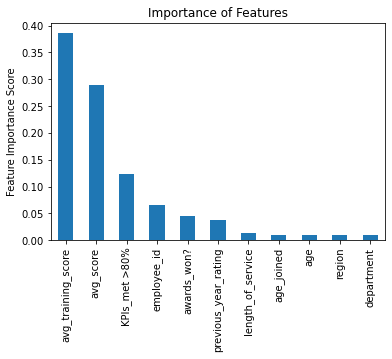

In [144]:
model1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000,max_depth=3, min_samples_split=2, 
                                    min_samples_leaf=3, subsample=1,max_features='auto', random_state=42)
%time model1.fit(X_train,y_train)
predictors=list(train.drop('is_promoted',axis =1).columns)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print_score(model1)
pred=model1.predict(X_valid)
print(classification_report(y_valid, pred))


In [145]:
print_score(model1)

[0.5872909698996656, 0.506258692628651, 0.9495928760110018, 0.9411179300049759]


In [142]:
ptest4 = {'min_samples_split' : [2, 5, 10],
          'max_features' : ['auto', 'sqrt'],
         'min_samples_leaf' : [3,4,5]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1,
                                                            n_estimators=1000,max_depth = 3,
                                                            subsample=1,random_state=42), 
            param_grid = ptest4, scoring=make_scorer(f1_score),n_jobs=-1,iid=False, cv=3)
%time tuning.fit(X_train,y_train)

Wall time: 9min 22s


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=1000,
                                                  n_iter_no_change=None,
        

In [56]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [143]:
tuning.best_params_, tuning.best_score_

({'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2},
 0.5043597934157769)

In [223]:
from xgboost.sklearn import XGBClassifier

params = {'objective': 'binary:logistic',
          'max_depth': 2,'learning_rate': 1.0,
          'silent': True,'n_estimators': 5
         }

%time model = XGBClassifier(**params).fit(X_train, y_train)


Wall time: 179 ms


In [152]:
XGBClassifier().get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [224]:
print_score(model)

[0.4143426294820718, 0.43873517786561267, 0.9359494567141418, 0.9371924586719743]


In [186]:
from scipy import stats
from sklearn.model_selection import KFold,RandomizedSearchCV

model_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }


kfold_5 = KFold(n_splits = 5, shuffle = True, random_state = 42)

clf = RandomizedSearchCV(model_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 50,  
                         scoring = make_scorer(f1_score), 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)
%time clf.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.5min finished


Wall time: 6min 46s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic'...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026B4E667308>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                     

In [187]:
clf.best_params_,clf.best_score_

({'colsample_bytree': 0.9045799458309223,
  'learning_rate': 0.09113426106388132,
  'max_depth': 4,
  'min_child_weight': 4,
  'n_estimators': 795,
  'subsample': 0.7281185407840126},
 0.5027833417698967)

In [225]:
param = {'colsample_bytree': 0.9045799458309223,
          'learning_rate': 0.09113426106388132,
          'max_depth': 4,
          'min_child_weight': 4,
          'n_estimators': 795,
          'subsample': 0.7281185407840126}
%time model2 =  XGBClassifier(**param).fit(X_train, y_train)
print_score(model2)


Wall time: 19.4 s
[0.5921812527765438, 0.5145228215767635, 0.9500013616186923, 0.9417813899485818]


In [180]:
test = pd.read_csv('test_2umaH9m.csv')
test.education.fillna("Bachelor's",inplace = True)
test.previous_year_rating.fillna(0,inplace = True)
#test.info()
con_2_cat(test)
for label,content in test.items():
    numericalize(test,content,label)
#test.info()
#test['imp_sum'] = test['awards_won?'] + test['KPIs_met >80%'] +test.previous_year_rating
#test['training_hours'] = test.no_of_trainings * test.avg_training_score
test['age_joined'] = test.age - test.length_of_service
avg_score = test.groupby(['department','region'])['avg_training_score'].transform('mean')
avg_score = avg_score/avg_score.mean()
test['avg_score'] = avg_score
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  int8   
 2   region                23490 non-null  int8   
 3   education             23490 non-null  int8   
 4   gender                23490 non-null  int8   
 5   recruitment_channel   23490 non-null  int8   
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
 13  age_joined            23490 non-null  int64  
 14  avg_score             23490 non-null  float64
dtypes: float64(2), int6

In [196]:
#test.drop(['imp_sum','training_hours'],axis = 1,inplace = True)
test.drop(['education','no_of_trainings','gender'],axis = 1,inplace = True)

In [199]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  int8   
 2   region                54808 non-null  int8   
 3   age                   54808 non-null  int64  
 4   previous_year_rating  54808 non-null  float64
 5   length_of_service     54808 non-null  int64  
 6   KPIs_met >80%         54808 non-null  int64  
 7   awards_won?           54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
 9   is_promoted           54808 non-null  int64  
 10  age_joined            54808 non-null  int64  
 11  avg_score             54808 non-null  float64
dtypes: float64(2), int64(8), int8(2)
memory usage: 4.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 11 columns):
 #   Colu

(None, None)

In [226]:
test_sc = scaler1.transform(test)


test_result = pd.DataFrame({'employee_id':test.employee_id,
                           'is_promoted':model2.predict(test_sc)})

                   

In [227]:
test_result.set_index('employee_id',inplace = True)

test_result.head()

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [228]:
test_result.is_promoted.value_counts()

0    23334
1      156
Name: is_promoted, dtype: int64

In [229]:
test_result.to_csv('second_23.csv')